<a href="https://colab.research.google.com/github/RickPardono/An-lise-de-dados-sobre-a-degrada-o-da-Floresta-Amaz-nica-Brasileira/blob/main/Scripts_Cap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas e o comando %matplotlib:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
# Carregando arquivo no notebook e fazendo a leitura:
amazon_fires = pd.read_csv('/content/inpe_brazilian_amazon_fires_1999_2019.csv')

In [4]:
# Exibindo o cabeçalho do Dataframe:
amazon_fires.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [5]:
# Foi verificado que o Dataset não apresenta valores nulos ao utilizar o comando: 
amazon_fires.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

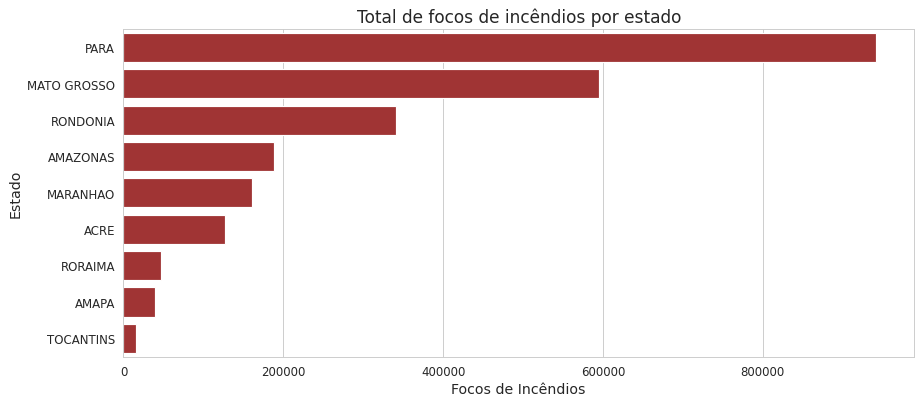

In [7]:
# Plotando o total de focos de incêndios por estado:
legal_amazon = (
    amazon_fires[['state','firespots']].groupby('state',as_index=False)
    .sum().sort_values('firespots',ascending=False)['state'].values
)

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazon_fires, x='firespots', y='state', estimator=sum, color='firebrick', order=legal_amazon, errorbar=None)    
plt.title("Total de focos de incêndios por estado", size="x-large")
plt.ylabel("Estado", size="large")
plt.xlabel("Focos de Incêndios", size="large")
fig = plt.gcf()
plt.savefig('grafico4.png', format='png')

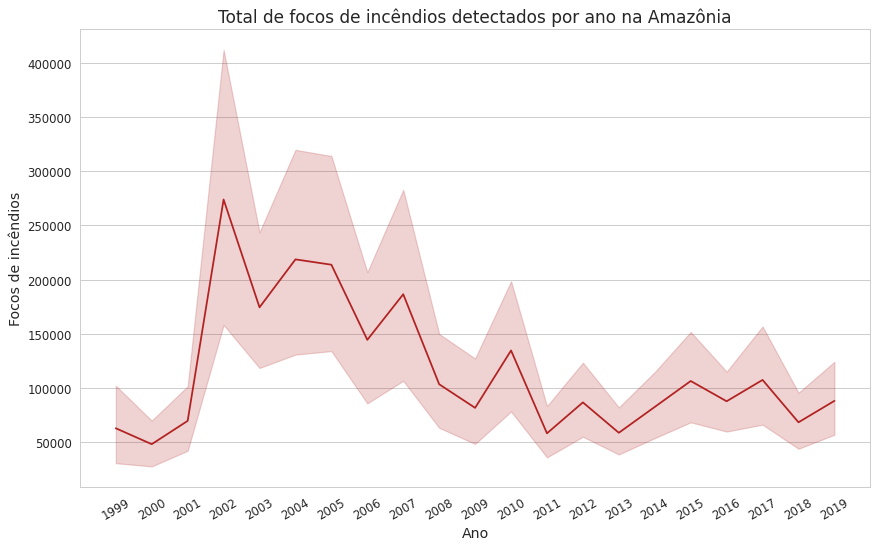

In [ ]:
# Plotando o total de focos de incêndios de 1999 a 2019:
int_year = list(range(1999, 2020))
plt.figure(figsize=(12,7),dpi=85)
sns.set_style("whitegrid")
sns.lineplot(data=amazon_fires, x='year', y='firespots', estimator='sum', color="firebrick")
plt.ylabel("Focos de incêndios", size="large")
plt.xlabel("Ano", size="large")
plt.xticks(int_year, rotation=30)
plt.title("Total de focos de incêndios detectados por ano na Amazônia", size="x-large")
plt.grid(axis='x')
fig = plt.gcf()
plt.savefig('grafico5.png', format='png')

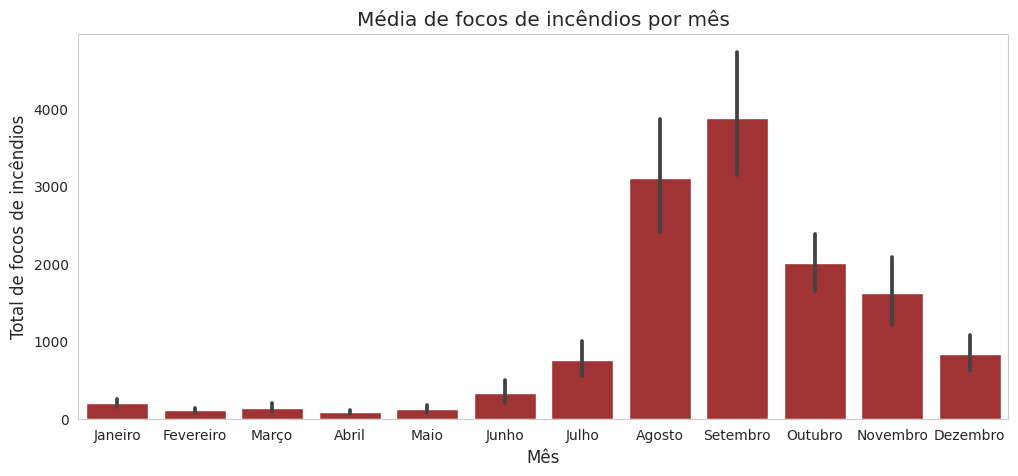

In [8]:
# Plotando a média de focos de incêndios por mês:
fullmonth = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
             'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

plt.figure(figsize=(12,5))
sns.set_style("whitegrid")    
sns.barplot(data=amazon_fires, x='month', y='firespots', color="firebrick")
plt.grid(False)
plt.ylabel("Total de focos de incêndios", size="large")
plt.title("Média de focos de incêndios por mês", size="x-large")
plt.xlabel("Mês", size="large")
plt.xticks(ticks=amazon_fires['month'].unique()-1, labels=fullmonth)
fig = plt.gcf()
plt.savefig('grafico5.png', format='png')
plt.show()